In [74]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [75]:
#변수엑셀보면 편의를 위해 날짜랑 단위 제거
data = pd.read_excel("변수.xlsx")
data.head()

,PM10,오 존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균 풍속,최다풍향,평균 상대습도,평균 현지기압
0,35,0.003,0.037,0.7,0.003,-2.2,0.1,0.6,50,64.4,1021.1
1,59,0.003,0.041,0.8,0.004,1.0,0.0,1.2,50,65.4,1018.7
2,65,0.010,0.036,0.8,0.004,-0.1,0.0,1.7,290,56.9,1016.4
3,53,0.014,0.040,0.9,0.004,1.2,0.0,1.9,50,50.8,1015.4
4,52,0.006,0.047,0.9,0.004,1.3,0.0,1.1,50,45.6,1019.7


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM10     1096 non-null   int64  
 1   오 존      1096 non-null   float64
 2   이산화질소    1096 non-null   float64
 3   일산화탄소    1096 non-null   float64
 4   아황산가스    1096 non-null   float64
 5   평균기온     1096 non-null   float64
 6   일강수량     1096 non-null   float64
 7   평균 풍속    1096 non-null   float64
 8   최다풍향     1096 non-null   int64  
 9   평균 상대습도  1096 non-null   float64
 10  평균 현지기압  1096 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 94.3 KB


In [77]:
data.describe().round(3)

,PM10,오 존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균 풍속,최다풍향,평균 상대습도,평균 현지기압
count,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000
mean,35.810,0.027,0.025,0.471,0.003,13.440,4.209,2.347,173.823,64.432,1006.110
std,28.879,0.012,0.011,0.149,0.001,10.385,15.005,0.677,106.813,14.335,8.047
min,3.000,0.001,0.007,0.200,0.001,-14.900,0.000,0.600,20.000,17.900,983.100
25%,21.000,0.018,0.016,0.400,0.003,5.500,0.000,1.800,50.000,53.800,999.600
50%,30.000,0.026,0.022,0.400,0.003,13.900,0.000,2.200,200.000,64.350,1006.200
75%,44.000,0.035,0.031,0.500,0.004,22.700,0.400,2.700,270.000,74.500,1012.625
max,497.000,0.075,0.062,1.000,0.005,31.700,176.200,5.800,360.000,99.300,1024.700


In [78]:
#피어슨 상관계수
corr = data.corr(method = 'pearson').round(2)
corr

,PM10,오 존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균 풍속,최다풍향,평균 상대습도,평균 현지기압
PM10,1.00,-0.08,0.41,0.45,0.27,-0.21,-0.15,-0.07,0.09,-0.15,0.15
오 존,-0.08,1.00,-0.53,-0.48,-0.05,0.47,-0.06,0.21,0.21,-0.04,-0.48
이산화질소,0.41,-0.53,1.00,0.86,0.53,-0.33,-0.11,-0.50,-0.25,-0.12,0.43
일산화탄소,0.45,-0.48,0.86,1.00,0.48,-0.44,-0.15,-0.42,-0.11,-0.09,0.44
아황산가스,0.27,-0.05,0.53,0.48,1.00,-0.15,-0.16,-0.31,0.02,-0.20,0.19
평균기온,-0.21,0.47,-0.33,-0.44,-0.15,1.00,0.19,-0.12,-0.23,0.48,-0.76
일강수량,-0.15,-0.06,-0.11,-0.15,-0.16,0.19,1.00,0.15,-0.10,0.45,-0.30
평균 풍속,-0.07,0.21,-0.50,-0.42,-0.31,-0.12,0.15,1.00,0.16,-0.08,-0.17
최다풍향,0.09,0.21,-0.25,-0.11,0.02,-0.23,-0.10,0.16,1.00,-0.20,0.05
평균 상대습도,-0.15,-0.04,-0.12,-0.09,-0.20,0.48,0.45,-0.08,-0.20,1.00,-0.54


In [79]:
from sklearn.model_selection import train_test_split
x = data[['오 존', '이산화질소', '일산화탄소', '아황산가스', '평균기온', '일강수량', '평균 풍속', '최다풍향', '평균 상대습도', '평균 현지기압']]
y = data[['PM10']]
#8:2로 테스트데이터 나눔

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=365)

In [80]:
x.head()

,오 존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균 풍속,최다풍향,평균 상대습도,평균 현지기압
0,0.003,0.037,0.7,0.003,-2.2,0.1,0.6,50,64.4,1021.1
1,0.003,0.041,0.8,0.004,1.0,0.0,1.2,50,65.4,1018.7
2,0.010,0.036,0.8,0.004,-0.1,0.0,1.7,290,56.9,1016.4
3,0.014,0.040,0.9,0.004,1.2,0.0,1.9,50,50.8,1015.4
4,0.006,0.047,0.9,0.004,1.3,0.0,1.1,50,45.6,1019.7


In [81]:
y.head()

,PM10
0,35
1,59
2,65
3,53
4,52


In [82]:
#선형회귀모델 구축
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train, axis=1)
model_trained = model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     30.81
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           4.32e-51
Time:                        22:21:50   Log-Likelihood:                -4105.6
No. Observations:                 876   AIC:                             8233.
Df Residuals:                     865   BIC:                             8286.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.9943    217.142      1.755      0.080     -45.192     807.181
오 존          328.7041    107.464      3.059      0.002     117.783     539.625
이산화질소        934.0261    188.999      4.942      0.000     563.075    1304.977
일산화탄소         71.3384     13.252      5.383      0.000      45.329      97.348
아황산가스      -1932.7276   1739.760     -1.111      0.267   -5347.373    1481.917
평균기온           0.0681      0.175      0.389      0.697      -0.275       0.411
일강수량          -0.1066      0.069     -1.547      0.122      -0.242       0.029
평균 풍속          8.4900      1.747      4.861      0.000       5.062      11.918
최다풍향           0.0433      0.010      4.415      0.000       0.024       0.063
평균 상대습도       -0.1502      0.093     -1.616      0.106      -0.333       0.032
평균 현지기압       -0.4201      0.210     -2.002      0.046      -0.832      -0.008
==============================================================================
Omnibus:                     1440.394   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           790944.654
Skew:                          10.163   Prob(JB):                         0.00
Kurtosis:                     148.796   Cond. No.                     2.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

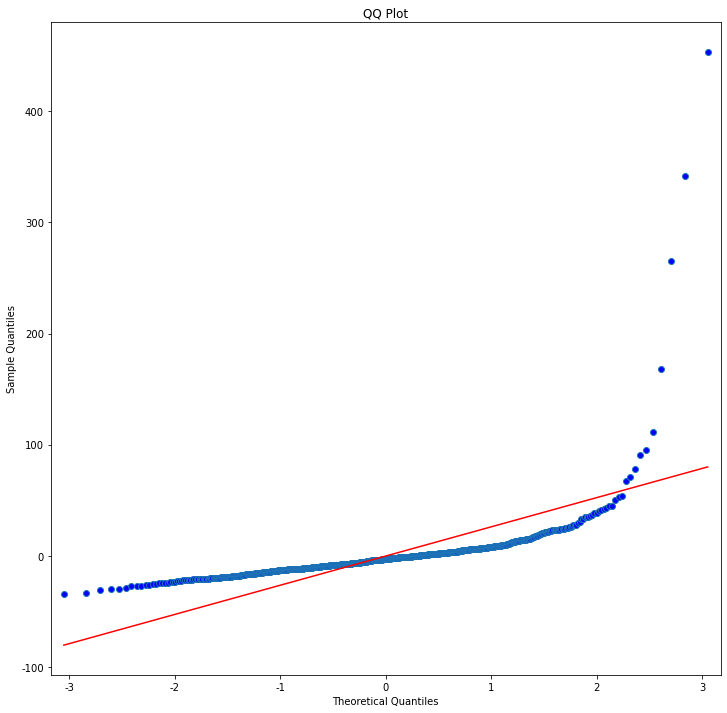

In [83]:
import matplotlib.pyplot as plt
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')